In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def count_overlapping_indices(df1_path, df2_path):
    df1 = pd.read_csv(df1_path, sep='\t', index_col=0)
    df2 = pd.read_csv(df2_path, sep='\t', index_col=0)
    overlapping_indices = len(set(df1.index) & set(df2.index))
    return overlapping_indices

#use this as the column names 
def extract_id_from_path(file_path):
    parent_dir = os.path.basename(os.path.dirname(file_path))
    return parent_dir

def count_overlapping_indices_between_all(dfs_paths):
    # res = {extract_id_from_path(p_from):{extract_id_from_path(p_to): count_overlapping_indices(p_from, p_to) 
    #                                      for p_to in dfs_paths[go_p+1:]} 
    #        for go_p, p_from in enumerate(dfs_paths)}
    # equivalent to below
    # initialize res as a dict
    res = {}
    # enumerate dfs_paths and store them as the key of res
    for go_x, p_x in enumerate(dfs_paths):
        x_name = extract_id_from_path(p_x)
        res[x_name] = {}
        # starting searching the y_values after the x id
        for p_y in dfs_paths[go_x + 1:]:
            y_name = extract_id_from_path(p_y)
            res[x_name][y_name] = count_overlapping_indices(p_x, p_y)
    return pd.DataFrame.from_dict(res)

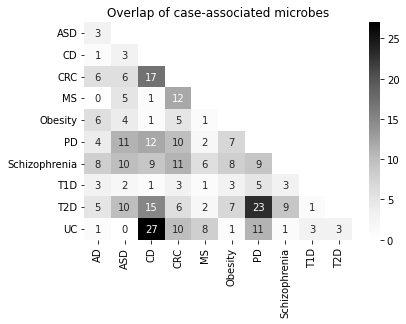

In [3]:
base_path = "../../../../Documents/Meta_disease_Jun/Pydeseq2_microbes/"
diseases = ["AD", "ASD", "CD", "CRC", "MS", "Obesity", "PD", "Schizophrenia", "T1D", "T2D", "UC"]
dfs_paths = [base_path + disease + "/top_microbe.tsv" for disease in diseases]
test = count_overlapping_indices_between_all(dfs_paths)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.diverging_palette(230, 20, as_cmap=True)
test = test.drop(columns=test.columns[-1])
sns.heatmap(test, cmap="Greys", annot=True, vmin=0, vmax=27)
plt.title('Overlap of case-associated microbes')
plt.savefig("Figure3_case_associated_microbes_overalp.pdf", bbox_inches='tight')

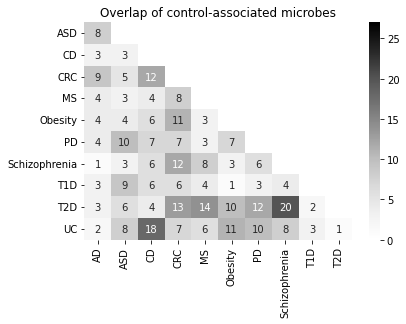

In [4]:
base_path = "../../../../Documents/Meta_disease_Jun/Pydeseq2_microbes/"
diseases = ["AD", "ASD", "CD", "CRC", "MS", "Obesity", "PD", "Schizophrenia", "T1D", "T2D", "UC"]
dfs_paths = [base_path + disease + "/bot_microbe.tsv" for disease in diseases]

test = count_overlapping_indices_between_all(dfs_paths)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.diverging_palette(230, 20, as_cmap=True)
test = test.drop(columns=test.columns[-1])
sns.heatmap(test, cmap="Greys", annot=True, vmin=0, vmax=27)
plt.title('Overlap of control-associated microbes')
plt.savefig("Figure3_control_associated_microbes_overalp.pdf", bbox_inches='tight')